In [1]:
# %env MUJOCO_GL=egl

import os
import mujoco
import numpy as np
import mediapy as media

from discoverse import DISCOVERSE_ASSERT_DIR

np.set_printoptions(precision=3, suppress=True, linewidth=500)

""

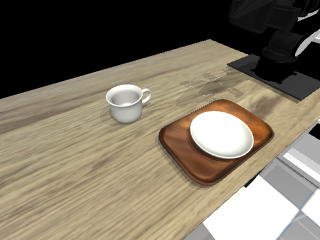

In [2]:
mjcf_file_path = "mjcf/tasks_airbot_play/coffeecup_place.xml"
mjcf_file_path = os.path.join(DISCOVERSE_ASSERT_DIR, mjcf_file_path)

mj_model = mujoco.MjModel.from_xml_path(mjcf_file_path)
mj_data = mujoco.MjData(mj_model)

options = mujoco.MjvOption()
mujoco.mjv_defaultOption(options)
mujoco.mj_resetData(mj_model, mj_data)
mujoco.mj_forward(mj_model, mj_data)

renderer = mujoco.Renderer(mj_model, 240, 320)
renderer.update_scene(mj_data, 0, options)
media.show_image(renderer.render())

In [3]:
renderer.disable_depth_rendering()
renderer.enable_segmentation_rendering()
renderer.update_scene(mj_data, 0, options)
seg = renderer.render()

""

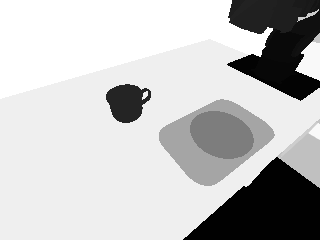

In [4]:
# Display the contents of the first channel, which contains object
# IDs. The second channel, seg[:, :, 1], contains object types.
geom_ids_ori = seg[:, :, 0]
# Infinity is mapped to -1
geom_ids = geom_ids_ori.astype(np.float64) + 1
# Scale to [0, 1]
geom_ids = geom_ids / geom_ids.max()
pixels = 255*geom_ids
media.show_image(pixels.astype(np.uint8))

[125] [5]
[125] [5]



""

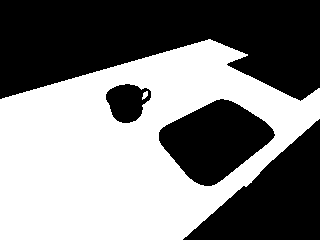

In [ ]:
# body_name = "table_60_120"
body_name = "table_60_120"
print(mj_model.body(body_name).geomadr, mj_model.body(body_name).geomnum)

mask = np.zeros_like(geom_ids_ori, dtype=np.uint8)
print(mj_model.body(body_name).geomadr, mj_model.body(body_name).geomnum)

mask[np.where((mj_model.body(body_name).geomadr <= geom_ids_ori) & (geom_ids_ori < mj_model.body(body_name).geomadr + mj_model.body(body_name).geomnum))] = 255

media.show_image(mask)
